In [1]:
%matplotlib inline
import jax
import jax.numpy as jnp
from jax import random, vmap
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bounds = jnp.array([[-1.0, 2.0]])
noise = 0.2
# Define your objective function using JAX
def f(X, noise=noise):
    return -jnp.sin(3 * X) - X**2 + 0.7 * X + noise * random.normal(random.PRNGKey(0), X.shape)

# Initial points
X_init = jnp.array([[-0.9], [1.1]])
Y_init = vmap(f)(*X_init.T)
print(X_init.shape, Y_init.shape)

(2, 1) (2,)


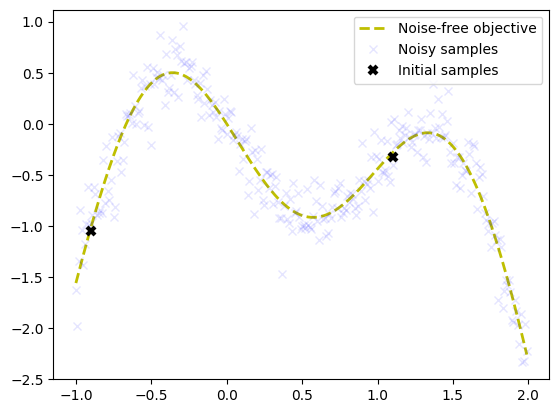

In [3]:
# Dense grid of points within bounds
X = jnp.arange(-1, 2, 0.01).reshape(-1, 1)
# Noise-free objective function values at X 
Y = f(X,0)
# Plot optimization objective with noise level 
plt.plot(X, Y, 'y--', lw=2, label='Noise-free objective')
plt.plot(X, f(X), 'bx', lw=1, alpha=0.1, label='Noisy samples')
plt.plot(X_init, Y_init, 'kx', mew=3, label='Initial samples')
plt.legend();

In [4]:
from GP_class import GaussianProcessRegressor
from optim_class import expected_improvement, suggest_next, propose_location

In [10]:
# Initialize samples
X_sample = X_init
Y_sample = Y_init

# initial parameters
n_iter = 10
num_steps = 40
lr = 0.01
# fit GP_process and find the optimum of hyper-parameters
gpr = GaussianProcessRegressor(sigma_y=noise)
gpr.fit(X_sample, Y_sample)
gpr.optim_jax(num_steps, lr, method='SGD')

# X_next = propose_location(expected_improvement, X_sample, Y_sample, gpr, bounds)
key =  random.PRNGKey(42)
X_next,key2 = suggest_next(key, X_sample, Y_sample, gpr, bounds,expected_improvement,lr=lr)
Y_next = f(X_next, noise)


TypeError: '<class 'jax._src.interpreters.ad.JVPTracer'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html

将 key 分割成两个新的 PRNG keys，key1 和 key2：这两个序列之间是独立的，不会相互影响。


In [ ]:
key = random.PRNGKey(42)
key1, key2 = random.split(key, 2)
key3,key4 = random.split(key2, 2)
print(key, key1, key2,key3,key4)

[ 0 42] [2465931498 3679230171] [255383827 267815257] [1224796891 3487907634] [ 754422081 3987528881]
